# 货币的时间价值
- 复利和利息的利息
- 终值(Future Value,简称FV)和现值(Present Value,简称PV)

- 时间轴(Time Lines)

In [1]:
[-1000,300,300,300,300,300]

[-1000, 300, 300, 300, 300, 300]

* 利率、收益率、折现率和机会成本
* 名义的无风险利率=实际的无风险利率+预期的通货膨胀率
* 要求的利率=名义的无风险利率+违约风险溢价+流动性风险溢价+期限风险溢价
* $实际年利率(EAR)={(1+\frac{名义年利率(nominal\ \ rate)}{年复利期数(m)})}^{m}-1$

In [2]:
import math
def f_ear(nr,m):
    return math.pow(1+nr/m,m)-1

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

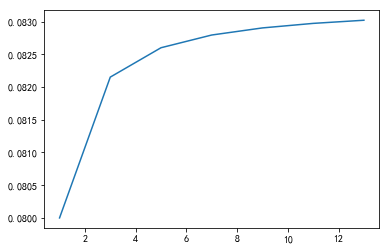

In [4]:
xy=np.array([(m,f_ear(.08,m)) for m in range(1,15,2)])
plt.plot(xy[:,0],xy[:,1])

* 连续计复利利率

In [5]:
import sympy as sp

In [6]:
nr,m=sp.symbols(" nr m")

In [7]:
expr_ear=(1+nr/m)**m
expr_ear

(1 + nr/m)**m

In [8]:
expr_ear_l=sp.Limit(expr_ear,m,sp.oo)
expr_ear_l

Limit((1 + nr/m)**m, m, oo, dir='-')

In [9]:
expr_ear_l.doit()

exp(nr)

In [10]:
pv,fv,y=sp.symbols("pv,fv,y")

* 单笔货币的终值(FV)

In [11]:
expr_fv=pv*(1+nr/m)**(m*y)
expr_fv

pv*(1 + nr/m)**(m*y)

In [12]:
expr_fv.subs([(pv,2500),(nr,.08),(m,4),[y,2]])

2929.14845250566

* 单笔货币的现值(PV)

In [13]:
expr_pv=fv/((1+nr/m)**(m*y))
expr_pv

fv*(1 + nr/m)**(-m*y)

In [14]:
expr_pv.subs([(fv,5000),(nr,.09),(m,12),[y,3]])

3820.74480307690

* 年金：在一段期间内，相同时间的间隔一系列相同金额的现金流。

* 普通年金的终值

In [15]:
def f_nianjin_fv(pmt,r,n):
    """
    pmt:每期现金流
    r:利率
    n:期数
    """
    return np.sum([pmt*(1+r)**i for i in range(n)])

In [16]:
f_nianjin_fv(150,.07,15)

3769.35330153286

* 普通年金的现值

In [17]:
def f_nianjin_pv(pmt,r,n):
    """
    pmt:每期现金流
    r:折现率
    n:期数
    """
    return np.sum([pmt/((1+r)**i) for i in range(1,n+1)])

In [18]:
f_nianjin_pv(200,.06,13)

1770.536592525154

* 先付年金的终值

In [19]:
def f_nianjin_xianfu_fv(pmt,r,n):
    """
    pmt:每期现金流
    r:利率
    n:期数
    """
    return np.sum([pmt*(1+r)**i for i in range(1,n+1)])

In [20]:
f_nianjin_xianfu_fv(100,.1,3)

364.1000000000001

* 先付年金的现值

In [21]:
def f_nianjin_xianfu_pv(pmt,r,n):
    """
    pmt:每期现金流
    r:折现率
    n:期数
    """
    return np.sum([pmt/((1+r)**i) for i in range(n)])

In [22]:
f_nianjin_xianfu_pv(100,.1,3)

273.55371900826447

* 永续年金的现值=$\frac{PMT}{r}$

In [23]:
def f_nianjin_yongxu_pv(pmt,r):
    return pmt/r

In [24]:
f_nianjin_yongxu_pv(4.5,0.08)

56.25

* 不规则现金流的现值和终值 
    1. 单独计算每期现金流的现值和终值
    2. 求和

* 年金不同的应用场景
    1. 贷款偿付(已知pv,y,r,求pmt)
    2. 计算年金的期数(已知fv,pmt,r,求y)
    3. 计算复利率

* 现金流可加性原理
    1. 一系列现金流的现值(终值)，就是该系列现金流中，每个单独的现金流的现值(终值)的加总。

**numpy关于货币时间价值相关的金融函数**

* fv：终值

In [25]:
x_rate,x_nper,x_pmt=.05/12,12*10,-100

In [26]:
# 现金流负值代表流出/投资，现金流正值代表流入/回报
np.fv(rate=x_rate,nper=x_nper,pmt=x_pmt,pv=-100,when="end")

15692.928894335748

In [27]:
# 先付年金等价普通年金(后付)
np.fv(rate=x_rate,nper=x_nper,pmt=x_pmt,pv=0,when="begin")+100

15692.92889433575

* pv：现值

In [28]:
np.pv(rate=x_rate,nper=x_nper,pmt=x_pmt,fv=0,when="end")

9428.135032823473

In [29]:
np.fv(rate=x_rate,nper=x_nper,pmt=x_pmt,pv=9428.135032823473,when="end")

-1.8189894035458565e-12

* pmt：每期支付金额

In [30]:
np.pmt(rate=x_rate,nper=x_nper,pv=9428.135032823473,fv=0,when="end")

-100.0

* ppmt：每期支付金额之本金

In [31]:
# per表示目前处在第几个还款期，
# 在等额还款方式下虽然每期偿还的总金额（本金+利息）相等，但是各期的本金及利息不相等，随着时间的推移，每期偿还的本金逐渐增加，利息逐渐减少。
np.ppmt(rate=x_rate,per=5,nper=x_nper,pv=9428.135032823473,fv=0,when="end")

-61.734381277854474

* ipmt：每期支付金额之利息

In [32]:
np.ipmt(rate=x_rate,per=5,nper=x_nper,pv=9428.135032823473,fv=0,when="end")

array(-38.26561872)

In [33]:
x_nper

120

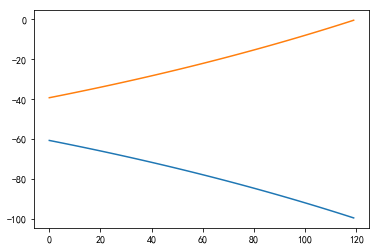

In [34]:
x_pis = [(np.ppmt(rate=x_rate,
                  per=i,
                  nper=x_nper,
                  pv=9428.135032823473,
                  fv=0,
                  when="end"),
          np.ipmt(rate=x_rate,
                  per=i,
                  nper=x_nper,
                  pv=9428.135032823473,
                  fv=0,
                  when="end")) for i in range(1, x_nper + 1)]
plt.plot(range(x_nper),x_pis)

* nper：分期数

In [35]:
np.nper(rate=x_rate,pmt=x_pmt,pv=9428.135032823473,fv=0,when='end')

array(120.)

* rate：利率

In [36]:
np.rate(nper=x_nper,pmt=x_pmt,pv=9428.135032823473,fv=0,when='end')

0.0041666666666694

In [37]:
x_rate

0.004166666666666667

# 现金流折现
## NPV(净现值)
一个投资项目的净现值(NPV)，是这个项目的预期现金流流入(expected cash inflows)的现值(PV)，减去改项目预期现金流流出(expected cash outflows)的现值。所有的现金流都按照一个合适的资金成本(appropriate cost of capital)折现。计算NPV的步骤：
1. 找出该项投资带来的所有成本(outflows-现金流出)和收益(inflows-现金流入)
2. 找出该项投资的合适折现率(discount rate)，又叫机会成本(opportunity cost)
3. 用合适的折现率，计算每一笔现金流的现值(PV)。现金流入为正的现值，将增加NPV
4. 将所有的折现的现金流(DCFs)加起来，计算NPV，$NPV=\sum_{t=0}^N{\frac{CF_t}{{(1+r)}^t}}$

In [38]:
def f_npv(values,r):
    return sum([values[i]/((1+r)**i)for i in range(len(values))])

In [39]:
f_npv(values=[-5,1.6,2.4,2.8],r=.12)

0.33482142857142794

**numpy计算NPV的金融函数**

In [40]:
np.npv(rate=.12,values=[-5,1.6,2.4,2.8])

0.33482142857142794

## IRR(内部回报率)
内部回报率，指的是在该回报率下，一项投资的所有的期望现金流入的现值，与该投资所有的期望现金流出的现值绝对值相同。即在该回报率下，这个投资的净现值(NPV)为0.

计算IRR，只需要知道一个投资机会的相关现金流即可。IRR与市场决定的折现率或者任何受市场引导的外部数据无关。求解IRR的一般公式：$NPV=0=\sum_{t=0}^N{\frac{CF_t}{{(1+IRR)}^t}}$

在IRR的应用中，多数涉及到资本预算。初始的现金流$CF_0$，表示一个投资机会的初始现金投入，因此是一个负数。所以，任何比$IRR$大的折现率下，得到的NPV都都是负数。当折现率为$IRR$时，这个投资的净现值(NPV)为0。

In [41]:
np.irr(values=[-5,1.6,2.4,2.8])

0.15517572757540488

**mirr(modified internal rate of return)：修正内部收益率**

在资本投资中，由于内部收益率（IRR）指标存在着再投资收益率假设失误，可能有多个内部收益率同时存在和内部收益率指标的结论与NPV指标结论相矛盾等不足。
修正的内含报酬率是在一定的贴现率条件下，将投资项目未来的现金流入量按照预定的贴现率计算至最后一年的终值，而将投资项目的现金流入量（投资额）折算成现值，并使现金流入量的终值与投资项目的现金流出量达到价值平衡的贴现率。

In [42]:
np.mirr(values=[-100, 39, 59, 55, 20],finance_rate=0,reinvest_rate=0)

0.14686295772275715

## NPV规则与IRR规则
### NPV决策规则
1. 如果一项项目有正的NPV,就应该投资这个项目。正的NPV项目会增加股东超额价值；
2. 如果一项项目有负的NPV,就不应该投资这个项目。负的NPV项目会减小股东超额价值；
3. 如果一项项目NPV=0，表示项目的投资收益率和预期收益率相等，对应的股东超额价值为0；
4. 两个项目，只能投资其中一个的时候，应该投资于NPV较大的一个。

### IRR规则
1. 如果一个项目的IRR，大于公司(投资者)要求的回报率，应该投资于这个项目；
2. 如果一个项目的IRR，小于公司(投资者)要求的回报率，不应该投资于这个项目；

### 不相容项目
对于两个互不相容的项目，NPV和IRR决策规则可能得到不同的决策结果。如下：

In [43]:
x_values1,x_values2,r=[-5000,8000],[-30000,40000],.1
np.irr(x_values1),np.irr(x_values2)

(0.6000000000000001, 0.33333333333333326)

In [44]:
np.npv(rate=r,values=x_values1),np.npv(rate=r,values=x_values2)

(2272.727272727272, 6363.63636363636)

此时，我们需要将NPV进行单位化再对比：

In [45]:
np.npv(rate=r,values=x_values1)/abs(x_values1[0]),np.npv(rate=r,values=x_values2)/abs(x_values2[0])

(0.4545454545454544, 0.21212121212121202)

## 收益率
### 持有期回报(holding period return-HPR)
如果某个资产中间会产生现金流，我们把包含进这些中间现金流的汇报，称作总投资汇报。那么，$持有期汇报HPR=\frac{总投资回报}{投资}-1$

In [46]:
992/980-1,(33+0.5)/30-1

(0.012244897959183598, 0.1166666666666667)

### 银行贴现收益率
$r_{BD}=\frac{D}{F}\times\frac{360}{t}$

$r_{BD}$：基于银行贴现的年度化收益率
$D$：投资的现值，即折现值
$F$：投资标的的票面价值
$t$：到期前剩下的天数
$360$：一年的总天数，按照习惯以360天计算

银行贴现收益率的特点：用折现值占票面价值的比例来表示。

In [47]:
(100000-98500)/100000*360/120

0.045

基于银行贴现计算出来的收益率，并不能代表投资者的实际收益率，原因如下：
1. 银行贴现收益率利用简单利息进行年度化，忽略了复利的影响；
2. 银行贴现收益率的计算基于标的的票面价值，而不是实际的购买价格；
3. 银行贴现收益率是按照一年360天计算，而不是实际天数年度化；